In [2]:
!pip install bspline
!pip install 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 436.9 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for bspline: filename=bspline-0.1.1-py3-none-any.whl size=84483 sha256=f20865ac1da54da06cfbf00a41b5929a2e5f29c578700d55969823148daaaaf7
  Stored in directory: /Users/davidmeltzer/Library/Caches/pip/wheels/f6/43/4f/d8b01bc336c71863d574d0675ee53b2e1d8b2c78942a3158f0
Successfully built bspline


In [46]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.stats import norm

from bspline import Bspline, splinelab

import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
S0 = 100
mu = 0.03
sigma = 0.20
r = 0.01
M = 1.

T = 50
delta_t = M/T

N_MC = 2000

gamma = np.exp(- r * delta_t)
lmbda = 10.0
alpha = 1.0

S = pd.DataFrame([], index = range(1,N_MC+1),columns=range(T+1))
S.loc[:, 0] = S0

RN = pd.DataFrame(np.random.randn(N_MC,T+1), index=range(1,N_MC+1))

for t in range(1,T+1):
    S.loc[:,t] = S.loc[:,t-1]*np.exp((mu - 1/2 * sigma**2) * delta_t + 
                                     sigma * np.sqrt(delta_t)*RN.loc[:,t])

/var/folders/j3/dkv_dx6s6m9g2j4mm7h6ycg80000gn/T/ipykernel_15579/3966872636.py:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  S.loc[:, 0] = S0
/var/folders/j3/dkv_dx6s6m9g2j4mm7h6ycg80000gn/T/ipykernel_15579/3966872636.py:22: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  S.loc[:,t] = S.loc[:,t-1]*np.exp((mu - 1/2 * sigma**2) * delta_t + sigma * np.sqrt(delta_t)*RN.loc[:,t])


In [23]:
S

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
1,100,100.936015,104.786459,104.657778,103.566392,103.471380,102.916000,100.574629,101.951214,105.363216,...,111.384155,114.196403,113.349524,113.018016,110.482732,107.251248,108.601425,112.304940,114.876598,113.233488
2,100,97.894412,100.093062,96.580630,99.326261,93.647953,90.829953,96.752738,98.051030,102.056474,...,104.966688,100.469370,103.777698,101.462258,101.949307,103.652958,108.304216,112.880546,114.045827,117.102775
3,100,102.109472,104.420804,103.688738,105.466327,102.644972,101.140830,101.801351,99.739436,95.910029,...,88.280307,86.976276,88.759887,84.558023,85.310605,86.222894,88.737015,88.138223,83.581337,86.147981
4,100,101.918552,95.981057,97.799121,95.967593,95.074897,95.844979,94.848888,93.139650,90.975246,...,127.314129,130.998362,130.363979,131.225445,129.261877,125.479219,133.027577,138.267635,134.862739,141.161767
5,100,101.572032,96.894644,101.376184,103.736988,104.297869,103.224224,106.179242,108.613019,107.358926,...,121.143821,118.708196,117.294467,120.488350,116.503305,123.393973,119.449046,111.347785,110.374970,114.699428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,100,101.637303,105.071608,107.343946,107.470671,109.069694,110.062219,107.732447,104.651487,106.096066,...,83.774798,85.432616,83.466188,83.035397,79.659649,81.555014,76.942124,73.351322,72.206173,69.441670
1997,100,96.959947,93.652442,98.903773,98.769775,96.822451,102.237730,98.986706,101.769677,99.895886,...,71.677328,68.117685,62.598550,60.154961,61.235000,61.385190,62.310893,61.092210,59.725739,57.709568
1998,100,96.907204,98.949471,100.145270,98.958668,96.343956,93.806201,96.507619,97.284720,93.391051,...,97.482056,98.175027,96.748037,94.562103,90.517723,90.621435,86.829496,83.027539,82.687542,75.475121
1999,100,100.121857,100.698022,105.866640,103.232561,99.283798,101.914280,104.438587,104.658239,104.149072,...,133.615717,130.092167,125.967708,123.595868,124.895500,132.772546,129.092121,130.609888,125.844999,123.759156


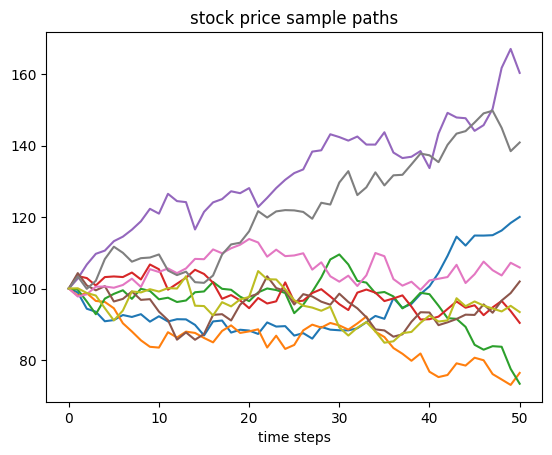

In [24]:
step_size = N_MC // 10
idx_plot = np.arange(step_size, N_MC, step_size)
plt.plot(S.T.iloc[:,idx_plot])
plt.xlabel('time steps')
plt.title('stock price sample paths')
plt.show()

In [8]:
idx_plot

array([ 200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800])

In [25]:
def negative_reward(mu, var, u, rf, lmbda):
    C = -(1-a)*rf - a*mu + lmbda*(a**2)*var
    return C

In [51]:
X = S
p = 3
ncolloc = 16
a_min = -1
a_max = 1

def get_basis_functions(X_min,X_max,a_min,a_max,ncolloc,p=3):
    
    tau_x = np.linspace(X_min, X_max, ncolloc)  # These are the sites to which we
    tau_a = np.linspace(a_min, a_max, ncolloc)  # would like to interpolate
    
    k_x = splinelab.aptknt(tau_x, p)
    k_a = splinelab.aptknt(tau_a, p)
    
    basis_x = Bspline(k_x, p)
    basis_a = Bspline(k_a, p)
    
    return basis_x, basis_a

In [59]:
num_t_steps = T + 1
num_basis = ncolloc**2

data_mat_t = np.zeros((num_t_steps, N_MC, num_basis))

x=X.values[:,0]
np.shape(x)

(2000,)

In [67]:
def function_S(t,data_mat_t):
    mat = data_mat_t[t,:,:]
    S_mat = np.dot(mat.T,mat)
    return S_mat

def function_M(t, Q, R, data_mat_t, gamma = 0.1):
    mat = data_mat_t[t,:,:]
    tmp = R + gamma * np.min(Q[:,t+1])
    M = np.dot(mat.T,tmp)
    return M

/var/folders/j3/dkv_dx6s6m9g2j4mm7h6ycg80000gn/T/ipykernel_15579/519759121.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  a_star.iloc[:, -1] = 0


In [72]:
mu = np.zeros(T)
var = np.zeros(T)

# optimal action
a_opt = np.zeros((N_MC, T))
a_star = pd.DataFrame([], index=range(1, N_MC+1), columns=range(T+1))
a_star.iloc[:, -1] = 0

# optimal Q-function with optimal action
max_Q_star = np.zeros((N_MC, T))

a_mean = []

grid_size_x = 20
grid_size_a = 500 

# set up a small grid, sufficiently nested inside the support of the basis functions
a_min_prime = a_min + 0.1
a_max_prime = a_max - 0.1

a_grid = np.linspace(a_min_prime, a_max_prime, grid_size_a)

Q_star = np.zeros((N_MC, T))
tau = 1e-6
a = a_min_prime + (a_max_prime - a_min_prime) * np.random.rand(N_MC)

for t in np.arange(T - 2,0,-1):
    error = tau
    q_prev = np.zeros(N_MC)
    ret = (S.loc[:,t+1]-S.loc[:,t])/S.loc[:,t]
    mu[t]=np.mean(ret)
    var[t] = np.var(ret)
    count = 0
    max_iter = 100
    x = X.values[:,t]
    basis_x, basis_a = get_basis_functions(np.min(x)-10,np.max(x)+10,a_min,a_max,
                                           ncolloc,p)
    x_grid = np.linspace(np.min(x),np.max(x),grid_size_x)
    Phi_mat = np.array([[np.kron(basis_x(x_grid[i]),basis_a(a_grid[j])).reshape(num_basis, 1)
                         for i in range(grid_size_x)] for j in range(grid_size_a)])[:,:,:,0]
    
    while (np.abs(error)>=tau) and (count<max_iter):
        R = negative_reward(mu[t],var[t],a,r,lmbda)
        data_mat_t[t, :, :] = np.array([np.kron(basis_x(x[i]), basis_a(a[i])).reshape(num_basis, 1) 
                                        for i in range(N_MC)])[:, :, 0]
        
        h = np.dot(data_mat_t[t],np.ones(np.shape(data_mat_t[t])[1]))
        if np.sum(h) !=N_MC:
            print("error: loss of partition of unity")
        S_t = function_S(t,data_mat_t)
        M_t = function_M(t,Q_star, R, data_mat_t, gamma)
        W_t = np.dot(np.linalg.pinv(S_t),M_t)
        
        Q_t = np.dot(Phi_mat,W_t)
        
        print("residual error: ||r||=||Sq-M||")
        print(np.linalg.norm(np.dot(S_t,W_t)-M_t))
        
        a_idx = np.argmin(Q_t,axis=0)
        a_star_ = np.zeros(grid_size_x,dtype = 'float64')
        
        for j in range(grid_size_x):
            a_star_[j] = a_grid[a_idx[j]]
        f=interp1d(x_grid,a_star_,kind='cubic')
        a_prime = f(x)
        
        R_prime = negative_reward(mu[t],var[t],a_prime,r,lmbda)
        idx = np.where(R_prime>R)
        a_prime[idx] = a[idx]
        a = a_prime
        a_mean.append(np.mean(a))
        Q_star[:,t] = np.dot(data_mat_t[t,:,:],W_t)
        error = np.linalg.norm(Q_star[:,t] - q_prev)
        
        q_prev = np.copy(Q_star[:,t])
        
        print('count,Q error, E[R], E[a]')
        print(count,error,np.mean(R),np.mean(a))
        count += 1
    a_opt[:,t] = a
        

/var/folders/j3/dkv_dx6s6m9g2j4mm7h6ycg80000gn/T/ipykernel_15579/2603594173.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  a_star.iloc[:, -1] = 0


residual error: ||r||=||Sq-M||
1.1943608071525975e-07
count,Q error, E[R], E[a]
0 0.43373322190705965 -0.007930562727009174 -0.6621577934625444
residual error: ||r||=||Sq-M||
0.0006337158390770814
count,Q error, E[R], E[a]
1 0.34887818705990764 -0.013379580582151376 -0.6620313234946481
residual error: ||r||=||Sq-M||
4.6853759467215306e-05
count,Q error, E[R], E[a]
2 9.27246238237193e-05 -0.013379638692665188 -0.661854183514532
residual error: ||r||=||Sq-M||
9.178976940395895e-05
count,Q error, E[R], E[a]
3 0.0002366680145255111 -0.013379872759187205 -0.6617908514859955
residual error: ||r||=||Sq-M||
8.064336424270055e-06
count,Q error, E[R], E[a]
4 5.7508348889066325e-05 -0.013379921585854123 -0.6617905820864188
residual error: ||r||=||Sq-M||
7.06764290217057e-06
count,Q error, E[R], E[a]
5 1.6762168464599108e-06 -0.01337992158807188 -0.6617453856599149
residual error: ||r||=||Sq-M||
3.651056110815671e-06
count,Q error, E[R], E[a]
6 1.873247132261366e-05 -0.01337993652984239 -0.6617363

In [73]:
a_star_exact = []
a_star_approx = []
for t in range(1, T-1):
    a_star_exact.append((mu[t] - r) / (2 * lmbda * var[t]))
    a_star_approx.append(np.mean(a_opt[:, t]))

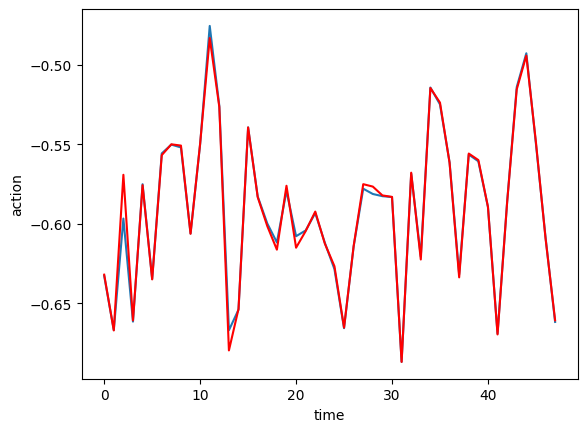

In [74]:
plt.plot(a_star_approx)
plt.plot(a_star_exact, color='red')
plt.xlabel('time')
plt.ylabel('action');

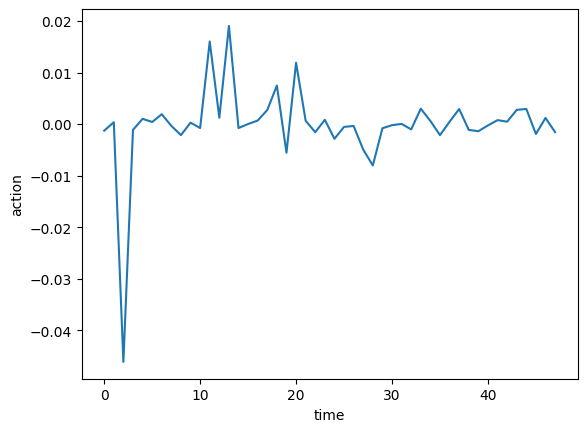

In [77]:
plt.plot((np.array(a_star_exact)-np.array(a_star_approx))/(np.array(a_star_approx)))
plt.xlabel('time')
plt.ylabel('action');

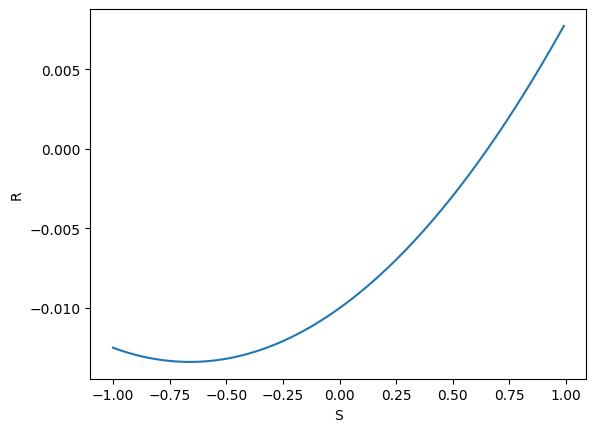

In [78]:
a_ = np.arange(-1, 1, 0.01)
plt.plot(a_, negative_reward(mu[t], var[t], a_, r, lmbda))
plt.xlabel('S')
plt.ylabel('R');